# [NTDS'19] tutorial 5: scikit-learn introduction
[ntds'19]: https://github.com/mdeff/ntds_2019

[Nicolas Aspert](https://people.epfl.ch/nicolas.aspert), [EPFL LTS2](https://lts2.epfl.ch).

* Dataset: [digits](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
* Tools: [scikit-learn](https://scikit-learn.org/stable/), [numpy](http://www.numpy.org), [scipy](https://www.scipy.org), [matplotlib](https://matplotlib.org)

*scikit-learn* is a machine learning python library. Most commonly used algorithms for classification, clustering and regression are implemented as part of the library, e.g.
* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
* [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)
* [Support vector machines](https://en.wikipedia.org/wiki/Support-vector_machine)
* ...

The aim of this tutorial is to show basic usage of some simple machine learning techniques. 
Check the official [documentation](https://scikit-learn.org/stable/documentation.html) for more information, especially the [tutorials](https://scikit-learn.org/stable/tutorial/index.html) section.

# Loading data
We will use a dataset that is part of scikit-learn named *digits*. It is made of 1797 handwritten digits images (of size 8x8 each) acquired from 44 different writers. 
Each image is labelled according to the digit present in the image.

You can find more informations about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)

![digits](https://scikit-learn.org/stable/_images/sphx_glr_plot_lle_digits_001.png)

In [14]:
%matplotlib inline
import sklearn
from sklearn.datasets import load_digits

loading the dataset

In [15]:
digits = load_digits()

The `digits` variable contains now contains several fields.

In `images` you have all samples as 2-dimensional arrays.

In [116]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [112]:
digits.images.shape

(1797, 8, 8)

In `data` the same samples are represented as 1-d vectors of length 64.

In [22]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [113]:
digits.data.shape

(1797, 64)

 In `target` you have the label corresponding to each image.

In [114]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [115]:
digits.target.shape

(1797,)

Let us visualize the 20 first entries of the dataset (image display kept small on purpose)

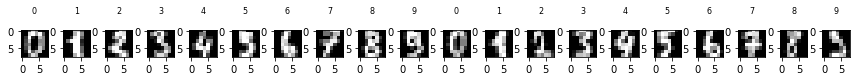

In [117]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(15,0.5))
for index, (image, label) in enumerate(zip(digits.images[0:20], digits.target[0:20])):
    plt.subplot(1, 20, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('%i\n' % label, fontsize = 8)

# Supervised learning - logistic regression
## Linear regression - reminder
Linear regression is used to predict an dependent value $y$ from an input n-dimensional vector $x$. The assumption made here is that the output depends linearly on the
input components, i.e. $y = mx + b$.

Given a set of input and output values, the goal is to compute $m$ and $b$ minimizing the MSE between the predicted and actual outputs. In scikit-learn this method is available through [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

## Logistic regression
Logistic regression is used to predict categorical data (e.g. yes/no, member/non-member, ham/spam, benign/malignant, ...). It uses the output of a linear predictor, and maps it to a probability using 
a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), such as the logistic function $s(z) = \frac{1}{1+e^{-z}}$. 
The output is a probability score 0 and 1, and using a simple thresholding the class output will be positive if the probability is greater than 0.5, negative if not. A [log-loss cost function](http://wiki.fast.ai/index.php/Logistic_Regression#Cost_Function) (not just the MSE as for linear regression) is used to train logistic regression (using gradient descent for instance).

[Multinomial logistic regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) is an extension of the binary classification problem to a $n$-classes problem.

## Training/Test set
before training our model, the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function will separate our dataset into a training set and a test set. The samples from the test set are never used during the training phase. This allows for a fair evaluation of the model's performance.

In [81]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    digits.data, digits.target, test_size=1/6.0) # keep ~300 images as test set

we can check that all classes are well balanced in the training and test sets

In [82]:
np.histogram(train_lbl, bins=10)

(array([150, 149, 150, 153, 144, 155, 151, 153, 145, 147], dtype=int64),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

In [83]:
np.histogram(test_lbl, bins=10)

(array([28, 33, 27, 30, 37, 27, 30, 26, 29, 33], dtype=int64),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]))

We can now create a logistic regression object and fit the parameters using the training data.

NB: As the dataset is quite simple, default parameters will give good results. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for fine-tuning possibilities.

In [118]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(verbose=1, solver='liblinear', multi_class='auto') # set solver and multi_class to silence warnings

In [119]:
logisticRegr.fit(train_img, train_lbl)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=1, warm_start=False)

# Model performance evaluation
For a binary classification problem, let us denote by $TP$, $TN$, $FP$, and $FN$ the number of true positives, true negatives, false positives and false negatives.
## Accuracy

The *accuracy* is defined by $a = \frac{TP}{TP + TN + FP + FN}$

 * compute accuracy on the test set

NB: in scikit-learn, models may have different definitions of the `score` method. For multi-class logistic regression, the value is the mean accuracy for each class.

In [120]:
score = logisticRegr.score(test_img, test_lbl)

In [121]:
score

0.9666666666666667

## F1 score
Accuracy only provides partial information about the performance of a model. Many other [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) are part of scikit-learn.

A metric that provides a more complete overview of the classification performance, is the [F1 score](https://en.wikipedia.org/wiki/F1_score). It takes into account not only the valid predictions but also the incorrect ones, by combining precision and recall.


*Precision* is the number of positive predictions divided by the total number of positive class values predicted, i.e. $p=\frac{TP}{TP+FP}$. A low precision indicates a high number of false positives.

*Recall* is the number of positive predictions divided by the number of positive class values in the test data, i.e. $r=\frac{TP}{TP+FN}$. A low recall indicates a high number of false negatives.

Finally the F1 score is the harmonic mean between precision and recall, i.e. $F1=2\frac{p.r}{p+r}$

Let us compute the predicted labels in the test set:

In [90]:
pred_lbl = logisticRegr.predict(test_img)

In [97]:
from sklearn.metrics import f1_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels

The [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) function computes the F1 score. The `average` parameter controls whether the result is computed globally over all classes (`average='micro'`) or if the F1 score is computed for each class then averaged (`average='macro'`)

In [126]:
f1_score(test_lbl, pred_lbl, average='micro')

0.9666666666666667

In [127]:
f1_score(test_lbl, pred_lbl, average='macro')

0.9665858702821275

`classification_report` provides a synthetic overview of all results for each class, as well as globally

In [92]:
print(classification_report(test_lbl, pred_lbl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.97      0.97      0.97        33
           2       1.00      0.96      0.98        27
           3       0.97      1.00      0.98        30
           4       1.00      1.00      1.00        37
           5       0.96      0.96      0.96        27
           6       1.00      1.00      1.00        30
           7       0.96      0.96      0.96        26
           8       0.82      0.97      0.89        29
           9       1.00      0.85      0.92        33

   micro avg       0.97      0.97      0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## Confusion matrix
In the case of a multi-class problem, the *confusion matrix* is often used to present the results

In [93]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  1  0]
 [ 0  0 26  1  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  1  0  0  0 26  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 25  1  0]
 [ 0  0  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  1  4 28]]


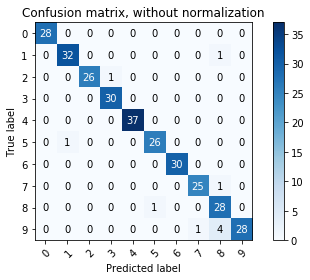

In [128]:
plot_confusion_matrix(test_lbl, pred_lbl, np.array(list(map(lambda x: str(x), range(10)))), normalize=False)